In [1]:
# Nifty analysis: 2003 Jan - 2020 April
# objective is to learn data analysis, wrangling and visualization using Python.
# Prepared a spreadsheet of Nifty and Dividend yield values

#Importing libraries
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
# install xlrd to read spreadsheets
!pip install xlrd
import xlrd
print('xlrd installed!')

xlrd installed!


In [3]:
# reading excel file into data frame
df_nifty = pd.read_excel('Nifty50.xlsx',
                       sheet_name='Nifty')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
# checking data frame
df_nifty.head()

,Date,Nifty,Div Yield
0,2003-01-01,1100.15,2.38
1,2003-01-02,1093.05,2.40
2,2003-01-03,1089.60,2.40
3,2003-01-06,1084.35,2.42
4,2003-01-07,1081.80,2.42


In [5]:
# view df details
df_nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4302 entries, 0 to 4301
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4302 non-null   datetime64[ns]
 1   Nifty      4302 non-null   float64       
 2   Div Yield  4302 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 101.0 KB


In [6]:
# import required libraries for graph plot
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
print ('Matplotlib version: ', mpl.__version__ )
print(plt.style.available)
mpl.style.use(['ggplot'])

Matplotlib version:  3.1.3
['bmh', 'seaborn-darkgrid', 'seaborn', 'Solarize_Light2', 'classic', 'seaborn-whitegrid', 'ggplot', 'seaborn-dark-palette', 'tableau-colorblind10', 'seaborn-ticks', 'seaborn-muted', 'seaborn-deep', 'seaborn-pastel', 'grayscale', 'seaborn-dark', 'seaborn-paper', 'seaborn-poster', '_classic_test', 'seaborn-talk', 'fast', 'fivethirtyeight', 'dark_background', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-notebook', 'seaborn-white']


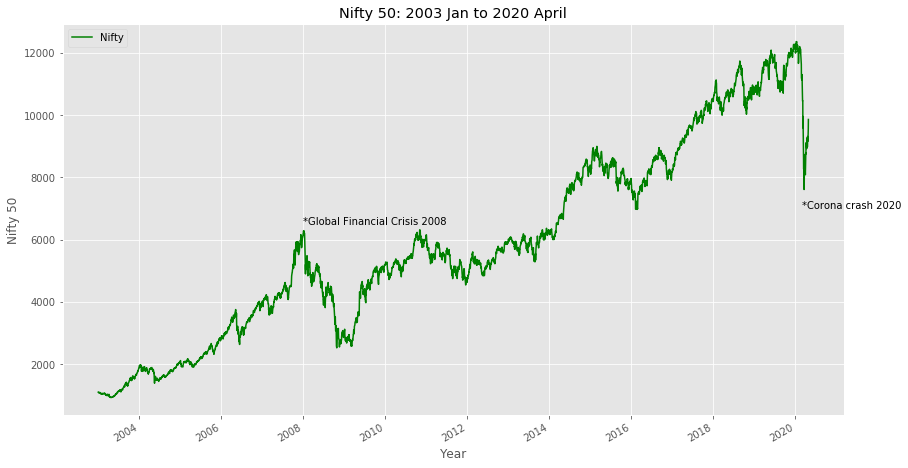

In [7]:
# creating new dataframe graphdf with 2 columns Date and Nifty
graphdf=df_nifty[['Date','Nifty']]

# plotting the line chart with 'Date' as X axis
graphdf.set_index('Date').plot(kind='line',figsize=(14,8),color='green')
plt.title('Nifty 50: 2003 Jan to 2020 April')
plt.xlabel('Year')
plt.ylabel('Nifty 50')
plt.text('2008-01-01',6500,'*Global Financial Crisis 2008')
plt.text('2020-03-01',7000,'*Corona crash 2020')
plt.savefig('pic01.png')
plt.show()

In [8]:
# creating a new dataframe for tracking percentage change and direction of daily Nifty50 values

# copying original dataframe
df2=df_nifty.copy()

# adding 3 new empty columns
df2['Change']=""
df2['Per_ch']=""
df2['Direction']=""

# counting number of rows
var_rows=len(df2.index)

# filling new columns
# column 'Change' contains absolute daily movements
# column 'Per_ch' contains percentage change
# column 'Direction' notes whether Nifty declined or advanced
for i in range(1, var_rows):
    df2.loc[i,'Change']=df2.loc[i,'Nifty']-df2.loc[i-1,'Nifty']
    df2.loc[i,'Per_ch']=df2.loc[i,'Change']*100/df2.loc[i-1,'Nifty']
    if (df2.loc[i,'Change']>0):
        df2.loc[i,'Direction']='Advanced'
    elif (df2.loc[i,'Change']<0):
        df2.loc[i,'Direction']='Declined'
    else:
        df2.loc[i,'Direction']='No Change'

# Creating new dataframe df3 without the first row, where difference is unavailable
df2=df2.drop(index=0)
df2.head()

,Date,Nifty,Div Yield,Change,Per_ch,Direction
1,2003-01-02,1093.05,2.40,-7.1,-0.645367,Declined
2,2003-01-03,1089.60,2.40,-3.45,-0.315631,Declined
3,2003-01-06,1084.35,2.42,-5.25,-0.481828,Declined
4,2003-01-07,1081.80,2.42,-2.55,-0.235164,Declined
5,2003-01-08,1089.35,2.41,7.55,0.697911,Advanced


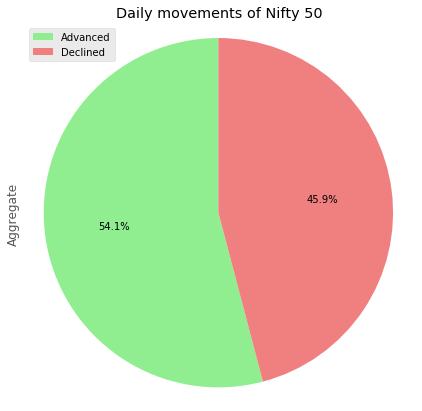

In [9]:
# counting number of Advanced and Declined days
count_adv=len(df2[df2['Direction']=='Advanced'])
count_dec=len(df2[df2['Direction']=='Declined'])

# creating a 2D list graphlist
graphlist=[['Advanced',count_adv],['Declined',count_dec]]

# creating a dataframe graphdf with the 2D list created
graphdf = pd.DataFrame(graphlist, columns = ['Change', 'Aggregate'])
# plotting the Pie chart
colors_list = ['lightgreen', 'lightcoral']
graphdf.set_index('Change')['Aggregate'].plot(kind='pie',figsize=(7,7),autopct='%1.1f%%',labels=None,colors=colors_list,startangle=90)
plt.title('Daily movements of Nifty 50')
plt.axis('equal')
plt.legend(labels=graphdf['Change'], loc='upper left') 
plt.savefig('pic02.png')
plt.show()


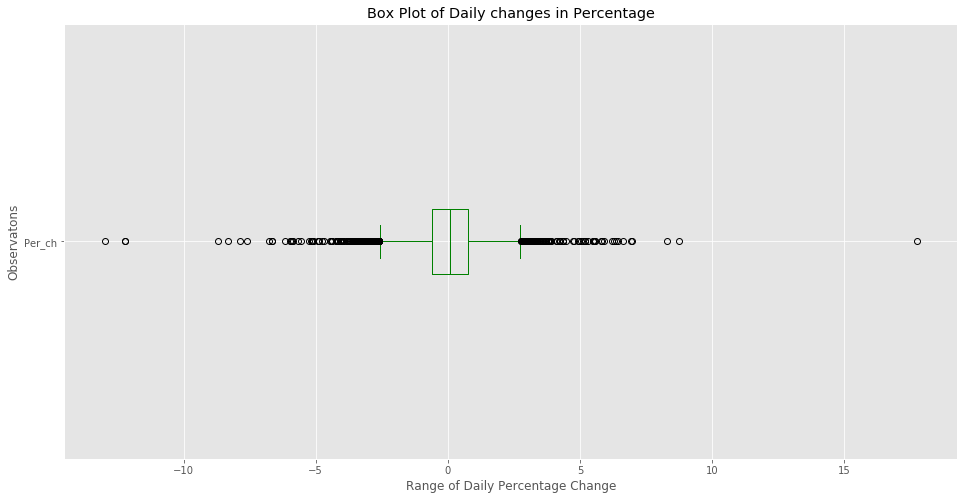

In [10]:
# to draw Boxplot of daily moving percentages
graphdf=df2[['Date','Per_ch']]
graphdf.set_index('Date')['Per_ch'].plot(kind='box',figsize=(16,8),color='green',vert=False)
plt.title('Box Plot of Daily changes in Percentage')
plt.xlabel('Range of Daily Percentage Change')
plt.ylabel('Observatons')
plt.savefig('pic03.png')
plt.show()

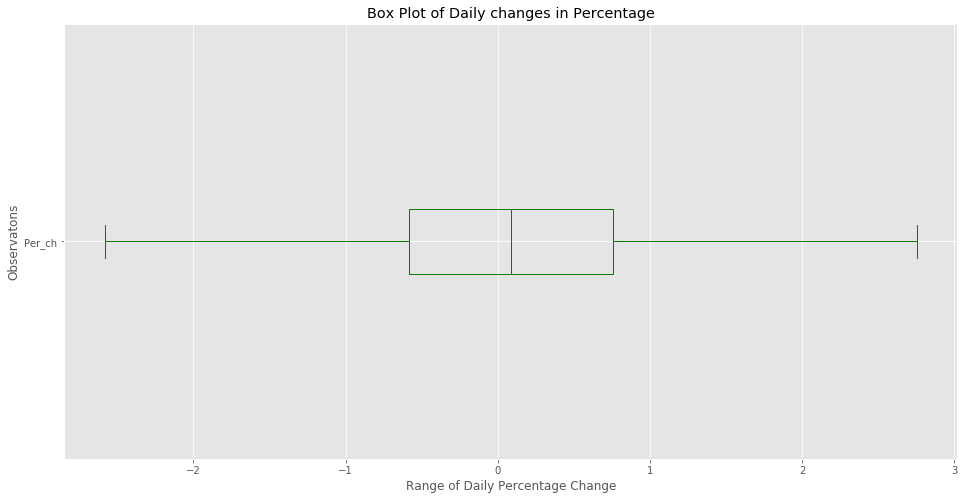

In [11]:
# to draw Boxplot of daily moving percentages without outliers
#graphdf=df2[['Date','Per_ch']]
graphdf.set_index('Date')['Per_ch'].plot(kind='box',figsize=(16,8),color='green',vert=False,showfliers=False)
plt.title('Box Plot of Daily changes in Percentage')
plt.xlabel('Range of Daily Percentage Change')
plt.ylabel('Observatons')
plt.savefig('pic04.png')
plt.show()


In [12]:
# print median, first quartile and 3rd quartile
boxmedian=np.median(df2[['Per_ch']])
boxfirst=np.percentile(df2[['Per_ch']], 25)
boxthird=np.percentile(df2[['Per_ch']], 75)
boxmin=np.percentile(df2[['Per_ch']], 0)
boxmax=np.percentile(df2[['Per_ch']], 100)
print("First Quartile:",str(boxfirst),
      "\nMedian:",str(boxmedian),
      "\nThird Quartile:",str(boxthird),
     "\nMinimum:",str(boxmin),
     "\nMaximum:",str(boxmax))

First Quartile: -0.5814020225673686 
Median: 0.08928530123381605 
Third Quartile: 0.7555723460521344 
Minimum: -12.980464127060364 
Maximum: 17.744066019364578


In [13]:
# to create a new Total Return Index, including dividends

# copying original dataframe
df_nifty_tri=df_nifty.copy()

# adding 3 new empty columns
df_nifty_tri['Nifty_Base_100']=""
df_nifty_tri['Div_add']=""
df_nifty_tri['NiftyTRI']=""

# counting number of rows
var_rows=len(df_nifty_tri.index)

# selecting first value for crating base100 index
base_val=df_nifty_tri.loc[0,'Nifty']

# setting up a factor to account dividend
# the data is for 208 months, hence total trading days = total rows / (208/12)
trading_days=var_rows/(208/12)
# Dividend yield for a day thus constitues addition of [Nifty value]*[Dividend yield]/trading days
for i in range(0, var_rows):
    df_nifty_tri.loc[i,'Nifty_Base_100']=df_nifty_tri.loc[i,'Nifty']*100/base_val
    df_nifty_tri.loc[i,'Div_add']=df_nifty_tri.loc[i,'Nifty']*df_nifty_tri.loc[i,'Div Yield']/(100*trading_days)
    if(i==0):
        df_nifty_tri.loc[i,'NiftyTRI']=100
    else:
        df_nifty_tri.loc[i,'NiftyTRI']=((df_nifty_tri.loc[i,'Nifty']+df_nifty_tri.loc[i,'Div_add'])/df_nifty_tri.loc[i-1,'Nifty'])*df_nifty_tri.loc[i-1,'NiftyTRI']

df_nifty_tri.head()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI
0,2003-01-01,1100.15,2.38,100,0.105497,100
1,2003-01-02,1093.05,2.40,99.3546,0.105697,99.3642
2,2003-01-03,1089.60,2.40,99.041,0.105363,99.0602
3,2003-01-06,1084.35,2.42,98.5638,0.10573,98.5925
4,2003-01-07,1081.80,2.42,98.332,0.105481,98.3702


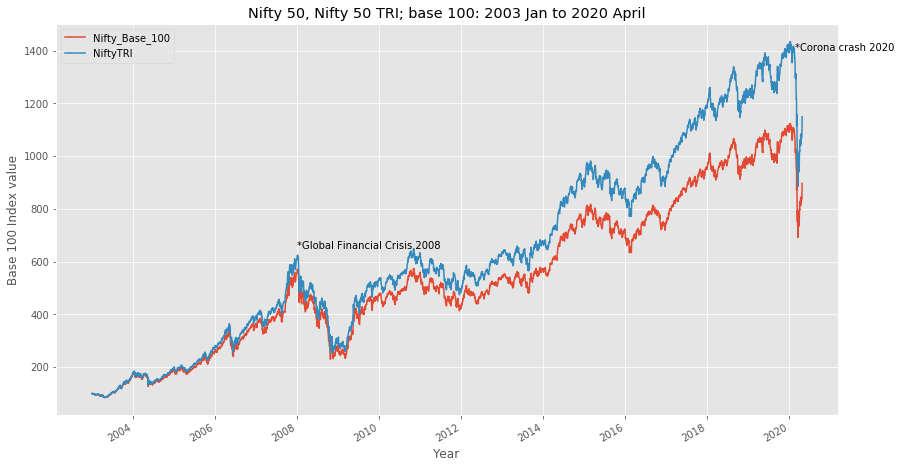

In [14]:
# plotting the line chart with 'Date' as X axis, 'Nifty and Nifty TRI with base 100' in Y axis

# creating new dataframe with required columns
graphdf=df_nifty_tri[['Date','Nifty_Base_100','NiftyTRI']]
graphdf.set_index('Date').plot(kind='line',figsize=(14,8))
plt.title('Nifty 50, Nifty 50 TRI; base 100: 2003 Jan to 2020 April')
plt.xlabel('Year')
plt.ylabel('Base 100 Index value')
plt.text('2008-01-01',650,'*Global Financial Crisis 2008')
plt.text('2020-03-01',1400,'*Corona crash 2020')
plt.savefig('pic05.png')
plt.show()

In [15]:
# let's have a look at the final values of Nifty Base 100 and Nifty TRI
# This represents values of 100RS invested without and with dividends re-invested
df_nifty_tri.tail()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI
4297,2020-04-24,9154.40,1.66,832.105,0.612279,1066.28
4298,2020-04-27,9282.30,1.64,843.73,0.613354,1081.25
4299,2020-04-28,9380.90,1.62,852.693,0.61231,1092.81
4300,2020-04-29,9553.35,1.59,868.368,0.612018,1112.97
4301,2020-04-30,9859.90,1.54,896.232,0.611794,1148.75


In [16]:
# creating new dataframe for 1 year average

# copying total return index
df_nifty_tri_1y=df_nifty_tri.copy()

# adding new empty column 1y_avg
df_nifty_tri_1y['1y_avg']=""

# working out 4302 rows for 17 years and 4 months; on average 248 trading days are in an year
# calculating rolling 1Y average on every day starting 249th row
for i in range(248, var_rows):
    df_nifty_tri_1y.loc[i,'1y_avg']=np.mean(df_nifty_tri_1y.loc[i-248:i,'NiftyTRI'])

    
df_nifty_tri_1y.tail()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI,1y_avg
4297,2020-04-24,9154.40,1.66,832.105,0.612279,1066.28,1311.19
4298,2020-04-27,9282.30,1.64,843.73,0.613354,1081.25,1310.11
4299,2020-04-28,9380.90,1.62,852.693,0.61231,1092.81,1309.14
4300,2020-04-29,9553.35,1.59,868.368,0.612018,1112.97,1308.27
4301,2020-04-30,9859.90,1.54,896.232,0.611794,1148.75,1307.47


In [17]:
# droping first 248 rows as they don't have the field 1y_avg

# loop to drop rows empty on col 1y_avg Uncomment on fresh run
for i in range(248):
    df_nifty_tri_1y=df_nifty_tri_1y.drop(index=i)
df_nifty_tri_1y.head()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI,1y_avg
248,2003-12-23,1780.30,1.55,161.823,0.111183,165.636,112.559
249,2003-12-24,1808.70,1.52,164.405,0.11077,168.289,112.833
250,2003-12-26,1837.05,1.50,166.982,0.111026,170.937,113.12
251,2003-12-29,1874.05,1.47,170.345,0.110997,174.39,113.423
252,2003-12-30,1873.25,1.47,170.272,0.110949,174.326,113.727


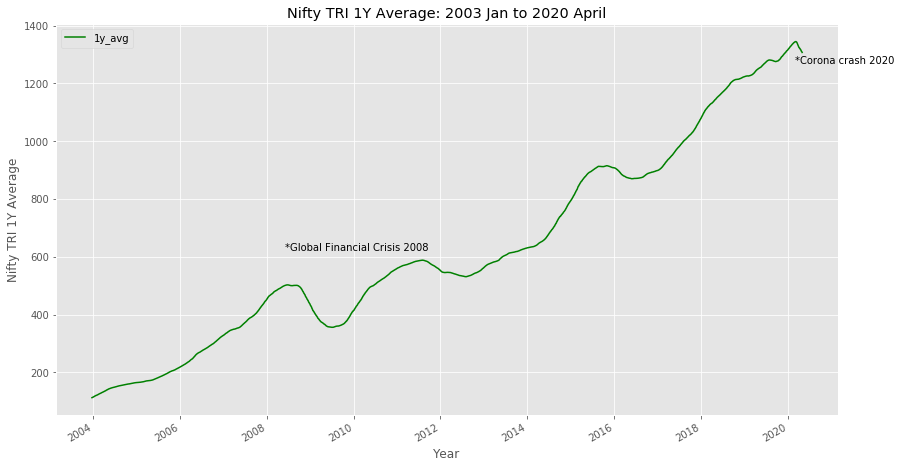

In [18]:
# creating new dataframe with required columns
graphdf=df_nifty_tri_1y[['Date','1y_avg']]
graphdf.set_index('Date').plot(kind='line',figsize=(14,8),color='green')
plt.title('Nifty TRI 1Y Average: 2003 Jan to 2020 April')
plt.xlabel('Year')
plt.ylabel('Nifty TRI 1Y Average')
plt.text('2008-06-01',620,'*Global Financial Crisis 2008')
plt.text('2020-03-01',1270,'*Corona crash 2020')
plt.savefig('pic06.png')
plt.show()

In [19]:
# Creating 2 columns: 1Y return and Direction
df_nifty_tri_1y['1y_retn']=""
df_nifty_tri_1y['Direction']=""

# calculating 1Y return for each row starting row number 248+249
# 248 is the current starting index, 249 is the supposed count of trading days in 1Y
for i in range(497, var_rows):
    df_nifty_tri_1y.loc[i,'1y_retn']=((df_nifty_tri_1y.loc[i,'1y_avg']/df_nifty_tri_1y.loc[i-249,'1y_avg'])-1)*100
    if (df_nifty_tri_1y.loc[i,'1y_retn']>0):
        df_nifty_tri_1y.loc[i,'Direction']='Advanced'
    else:
        df_nifty_tri_1y.loc[i,'Direction']='Declined'

# loop to drop rows empty on col 1y_avg. If commented for testing, Uncomment on fresh run
for i in range(248,497):
    df_nifty_tri_1y=df_nifty_tri_1y.drop(index=i)
df_nifty_tri_1y.tail()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI,1y_avg,1y_retn,Direction
4297,2020-04-24,9154.40,1.66,832.105,0.612279,1066.28,1311.19,5.09488,Advanced
4298,2020-04-27,9282.30,1.64,843.73,0.613354,1081.25,1310.11,4.95632,Advanced
4299,2020-04-28,9380.90,1.62,852.693,0.61231,1092.81,1309.14,4.83272,Advanced
4300,2020-04-29,9553.35,1.59,868.368,0.612018,1112.97,1308.27,4.71859,Advanced
4301,2020-04-30,9859.90,1.54,896.232,0.611794,1148.75,1307.47,4.60463,Advanced


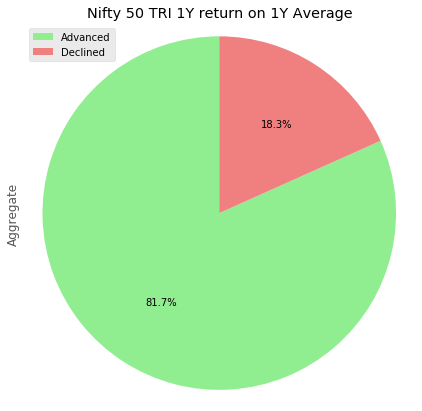

In [20]:
# counting number of Advanced, Declined days
count_adv=len(df_nifty_tri_1y[df_nifty_tri_1y['Direction']=='Advanced'])
count_dec=len(df_nifty_tri_1y[df_nifty_tri_1y['Direction']=='Declined'])

# creating a 2D list graph3
graphlist=[['Advanced',count_adv],['Declined',count_dec]]

# creating a dataframe graph3df with the 2D list created
graphdf = pd.DataFrame(graphlist, columns = ['Change', 'Aggregate'])
# plotting the Pie chart
colors_list = ['lightgreen', 'lightcoral']
graphdf.set_index('Change')['Aggregate'].plot(kind='pie',figsize=(7,7),autopct='%1.1f%%',labels=None,colors=colors_list,startangle=90)
plt.title('Nifty 50 TRI 1Y return on 1Y Average')
plt.axis('equal')
plt.legend(labels=graphdf['Change'], loc='upper left') 
plt.savefig('pic07.png')
plt.show()


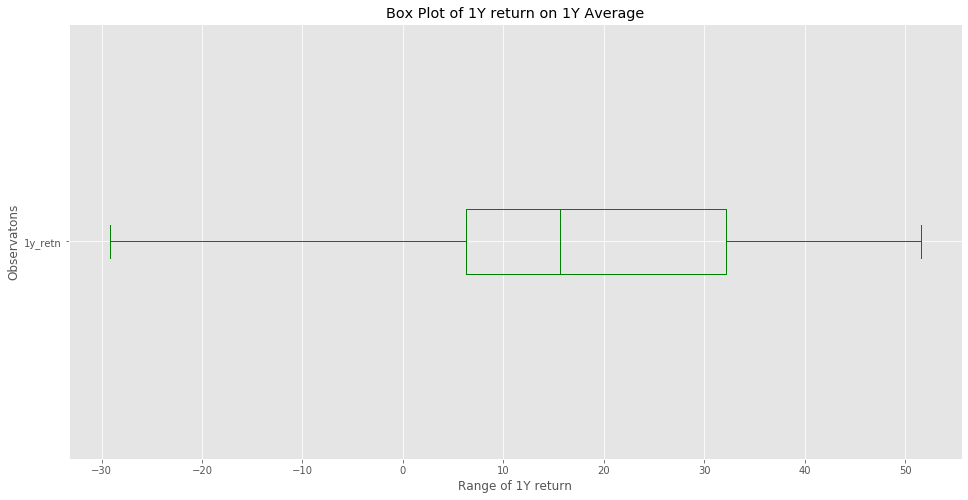

In [21]:
# to draw Boxplot of 1Y returns of 1Y average values
graphdf=df_nifty_tri_1y[['Date','1y_retn']]
graphdf.set_index('Date')['1y_retn'].plot(kind='box',figsize=(16,8),color='green',vert=False)
plt.title('Box Plot of 1Y return on 1Y Average')
plt.xlabel('Range of 1Y return')
plt.ylabel('Observatons')
plt.savefig('pic08.png')
plt.show()

In [22]:
# print median, first quartile and 3rd quartile
boxmedian=np.median(df_nifty_tri_1y[['1y_retn']])
boxfirst=np.percentile(df_nifty_tri_1y[['1y_retn']], 25)
boxthird=np.percentile(df_nifty_tri_1y[['1y_retn']], 75)
boxmin=np.percentile(df_nifty_tri_1y[['1y_retn']], 0)
boxmax=np.percentile(df_nifty_tri_1y[['1y_retn']], 100)
print("First Quartile:",str(boxfirst),
      "\nMedian:",str(boxmedian),
      "\nThird Quartile:",str(boxthird),
     "\nMinimum:",str(boxmin),
     "\nMaximum:",str(boxmax))


First Quartile: 6.329283251998485 
Median: 15.654264415735653 
Third Quartile: 32.18124528914916 
Minimum: -29.202635809640633 
Maximum: 51.586490228196546


In [23]:
# creating new dataframe for 3 year average

# copying total return index
df_nifty_tri_3y=df_nifty_tri.copy()

# adding new empty column 3y_avg
df_nifty_tri_3y['3y_avg']=""

# working out 4302 rows for 17 years and 4 months; on average 248.19 trading days are in an year
# calculating rolling 3Y average on every day starting 745th row
for i in range(745, var_rows):
    df_nifty_tri_3y.loc[i,'3y_avg']=np.mean(df_nifty_tri_3y.loc[i-745:i,'NiftyTRI'])
    
df_nifty_tri_3y.tail()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI,3y_avg
4297,2020-04-24,9154.40,1.66,832.105,0.612279,1066.28,1232.31
4298,2020-04-27,9282.30,1.64,843.73,0.613354,1081.25,1232.39
4299,2020-04-28,9380.90,1.62,852.693,0.61231,1092.81,1232.49
4300,2020-04-29,9553.35,1.59,868.368,0.612018,1112.97,1232.6
4301,2020-04-30,9859.90,1.54,896.232,0.611794,1148.75,1232.77


In [24]:
# droping first 745 rows as they don't have the field 3y_avg

# loop to drop rows empty on col 3y_avg Uncomment on fresh run
for i in range(745):
    df_nifty_tri_3y=df_nifty_tri_3y.drop(index=i)
df_nifty_tri_3y.head()


,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI,3y_avg
745,2005-12-14,2804.55,1.59,254.924,0.179669,271.194,163.57
746,2005-12-15,2778.55,1.61,252.561,0.180242,268.697,163.796
747,2005-12-16,2810.15,1.59,255.433,0.180027,271.77,164.027
748,2005-12-19,2842.60,1.56,258.383,0.17867,274.926,164.263
749,2005-12-20,2826.20,1.57,256.892,0.178778,273.357,164.497


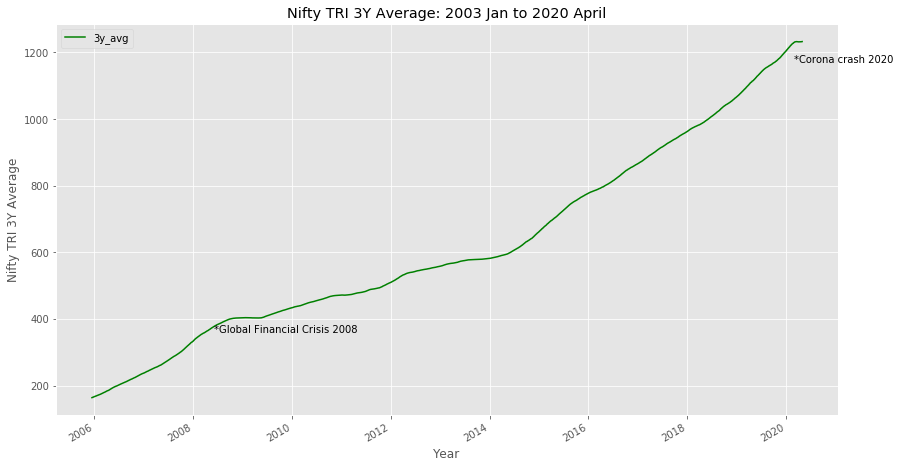

In [25]:
# creating new dataframe with required columns
graphdf=df_nifty_tri_3y[['Date','3y_avg']]
graphdf.set_index('Date').plot(kind='line',figsize=(14,8),color='green')
plt.title('Nifty TRI 3Y Average: 2003 Jan to 2020 April')
plt.xlabel('Year')
plt.ylabel('Nifty TRI 3Y Average')
plt.text('2008-06-01',360,'*Global Financial Crisis 2008')
plt.text('2020-03-01',1170,'*Corona crash 2020')
plt.savefig('pic09.png')
plt.show()

In [26]:
# Creating 2 columns: 5Y return and Direction
df_nifty_tri_3y['5y_retn']=""
df_nifty_tri_3y['Direction']=""

# calculating 5Y return for each row starting row number 745+1241
# 745 is the current starting index, 1241 is the supposed count of trading days in 5 Years
# to get CAGR, ((5th year value)/(starting value))^(1/5) is done
for i in range(1986, var_rows):
    df_nifty_tri_3y.loc[i,'5y_retn']=(((df_nifty_tri_3y.loc[i,'3y_avg']/df_nifty_tri_3y.loc[i-1241,'3y_avg'])**0.2)-1)*100
    if (df_nifty_tri_3y.loc[i,'5y_retn']>0):
        df_nifty_tri_3y.loc[i,'Direction']='Advanced'
    else:
        df_nifty_tri_3y.loc[i,'Direction']='Declined'

df_nifty_tri_3y.tail()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI,3y_avg,5y_retn,Direction
4297,2020-04-24,9154.40,1.66,832.105,0.612279,1066.28,1232.31,12.0457,Advanced
4298,2020-04-27,9282.30,1.64,843.73,0.613354,1081.25,1232.39,12.0295,Advanced
4299,2020-04-28,9380.90,1.62,852.693,0.61231,1092.81,1232.49,12.0137,Advanced
4300,2020-04-29,9553.35,1.59,868.368,0.612018,1112.97,1232.6,11.9986,Advanced
4301,2020-04-30,9859.90,1.54,896.232,0.611794,1148.75,1232.77,11.9847,Advanced


In [27]:
# loop to drop rows empty on col 5y_retn. If commented for testing, Uncomment on fresh run
for i in range(745,1986):
    df_nifty_tri_3y=df_nifty_tri_3y.drop(index=i)
df_nifty_tri_3y.head()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI,3y_avg,5y_retn,Direction
1986,2010-12-15,5892.30,1.06,535.591,0.251653,606.291,471.163,23.5644,Advanced
1987,2010-12-16,5948.75,1.05,540.722,0.251667,612.125,471.192,23.5318,Advanced
1988,2010-12-20,5947.05,1.05,540.567,0.251595,611.976,471.218,23.4983,Advanced
1989,2010-12-21,6000.65,1.04,545.439,0.251445,617.518,471.253,23.4647,Advanced
1990,2010-12-22,5984.40,1.04,543.962,0.250764,615.872,471.268,23.4303,Advanced


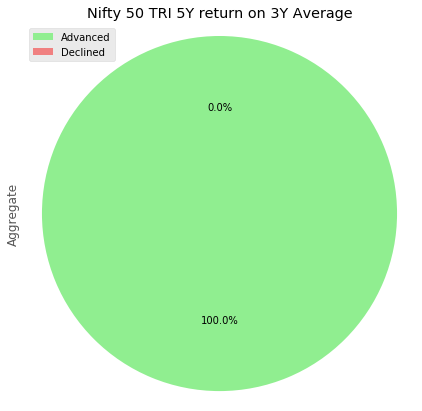

In [28]:
# counting number of Advanced, Declined days
count_adv=len(df_nifty_tri_3y[df_nifty_tri_3y['Direction']=='Advanced'])
count_dec=len(df_nifty_tri_3y[df_nifty_tri_3y['Direction']=='Declined'])

# creating a 2D list graphlist
graphlist=[['Advanced',count_adv],['Declined',count_dec]]

# creating a dataframe graph3df with the 2D list created
graphdf = pd.DataFrame(graphlist, columns = ['Change', 'Aggregate'])
# plotting the Pie chart
colors_list = ['lightgreen', 'lightcoral']
graphdf.set_index('Change')['Aggregate'].plot(kind='pie',figsize=(7,7),autopct='%1.1f%%',labels=None,colors=colors_list,startangle=90)
plt.title('Nifty 50 TRI 5Y return on 3Y Average')
plt.axis('equal')
plt.legend(labels=graphdf['Change'], loc='upper left') 
plt.savefig('pic10.png')
plt.show()

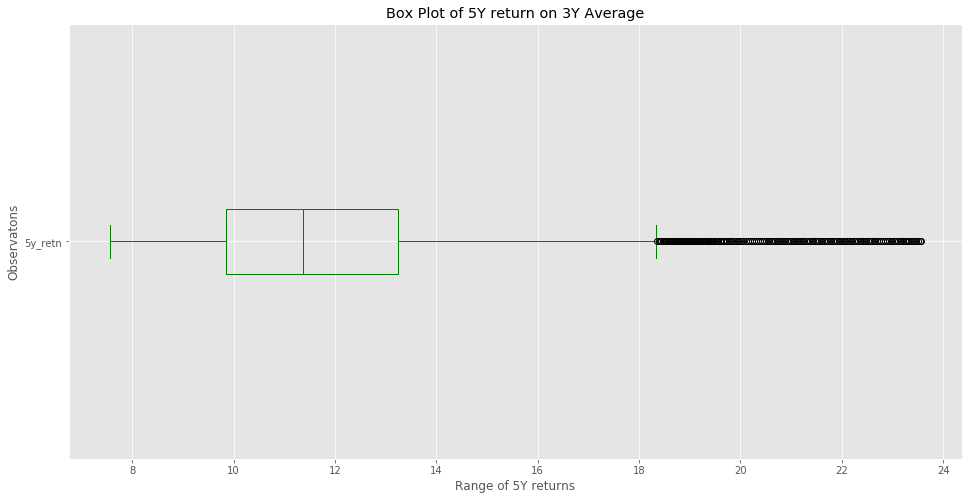

In [29]:
# to draw Boxplot of 5Y returns of 3Y average values
graphdf=df_nifty_tri_3y[['Date','5y_retn']]
graphdf.set_index('Date')['5y_retn'].plot(kind='box',figsize=(16,8),color='green',vert=False)
plt.title('Box Plot of 5Y return on 3Y Average')
plt.xlabel('Range of 5Y returns')
plt.ylabel('Observatons')
plt.savefig('pic11.png')
plt.show()

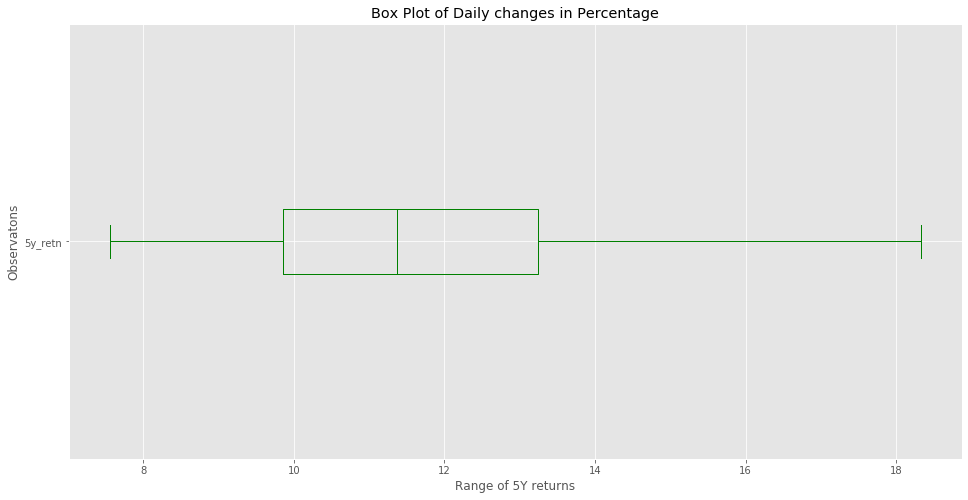

In [30]:
# to draw Boxplot of 5Y returns of 3Y average values excluding outliers
graphdf=df_nifty_tri_3y[['Date','5y_retn']]
graphdf.set_index('Date')['5y_retn'].plot(kind='box',figsize=(16,8),color='green',vert=False,showfliers=False)
plt.title('Box Plot of Daily changes in Percentage')
plt.xlabel('Range of 5Y returns')
plt.ylabel('Observatons')
plt.savefig('pic12.png')
plt.show()

In [31]:
# print median, first quartile and 3rd quartile
boxmedian=np.median(df_nifty_tri_3y[['5y_retn']])
boxfirst=np.percentile(df_nifty_tri_3y[['5y_retn']], 25)
boxthird=np.percentile(df_nifty_tri_3y[['5y_retn']], 75)
boxmin=np.percentile(df_nifty_tri_3y[['5y_retn']], 0)
boxmax=np.percentile(df_nifty_tri_3y[['5y_retn']], 100)
print("First Quartile:",str(boxfirst),
      "\nMedian:",str(boxmedian),
      "\nThird Quartile:",str(boxthird),
     "\nMinimum:",str(boxmin),
     "\nMaximum:",str(boxmax))


First Quartile: 9.859421943052194 
Median: 11.36533871441996 
Third Quartile: 13.249925015022528 
Minimum: 7.5520515022952095 
Maximum: 23.564409481072634
